# Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn, Warings Library and so on.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Transformers
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset as pandas dataframe
#### Showing the top 5 rows

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Droping the duplicate values
df.drop_duplicates(ignore_index=True,inplace=True)

### Preparing for X and Y variables

##### Creating X-variable

In [4]:
X = df.drop(labels=['charges'], axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


#### Preprocessing the Data

In [5]:
# Preprocessing the data
oh_encoder = OneHotEncoder()
scaler = StandardScaler()

# One hot encoding in X variable
X = pd.get_dummies(X, drop_first=True)

# Standard scaling on the numerical data of X variable
X = scaler.fit_transform(X)


##### Shape of X variable

In [6]:
X.shape

(1337, 8)

##### Creating Y-variable

In [7]:
Y = df['charges']
Y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

#### Train-Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((1069, 8), (268, 8))

#### Defining a Function for Model Evaluation to give all metrics after model training.

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Creating a Model Training loop

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(max_iter=1000),
    "Ridge": Ridge(max_iter=1000),
    "K-Neighbors Regressor": KNeighborsRegressor(n_jobs=3),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
    "GB Regressor": GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6081.1069
- Mean Absolute Error: 4181.9015
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5956.3429
- Mean Absolute Error: 4177.0456
- R2 Score: 0.8069


Lasso
Model performance for Training set
- Root Mean Squared Error: 6081.1082
- Mean Absolute Error: 4181.8261
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5956.9621
- Mean Absolute Error: 4177.2144
- R2 Score: 0.8069


Ridge
Model performance for Training set
- Root Mean Squared Error: 6081.1148
- Mean Absolute Error: 4182.9552
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5959.2804
- Mean Absolute Error: 4179.6642
- R2 Score: 0.8067


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4511.2697
- Mean Absolute Error: 2761.6555


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1844.3133
- Mean Absolute Error: 1053.8692
- R2 Score: 0.9752
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4695.7490
- Mean Absolute Error: 2653.2604
- R2 Score: 0.8800


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 757.5050
- Mean Absolute Error: 451.8100
- R2 Score: 0.9958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4978.5962
- Mean Absolute Error: 2922.3996
- R2 Score: 0.8651


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2667.3504
- Mean Absolute Error: 1470.7480
- R2 Score: 0.9480
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4658.4549
- Mean Absolute Error: 2689.8573
- R2 Score: 0.8819


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 4835.0249
- Mean Ab

### Results

In [11]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],
             ascending=False)

,Model Name,R2_Score
9,GB Regressor,0.901741
7,CatBoosting Regressor,0.881902
5,Random Forest Regressor,0.880004
8,AdaBoost Regressor,0.869136
6,XGBRegressor,0.865112
3,K-Neighbors Regressor,0.837051
0,Linear Regression,0.806929
1,Lasso,0.806889
2,Ridge,0.806738
4,Decision Tree,0.796402


### GradientBoosting Regressor

In [12]:
gb_model = GradientBoostingRegressor()
gb_model = gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 90.14


### Ploting the y_test and y_pred

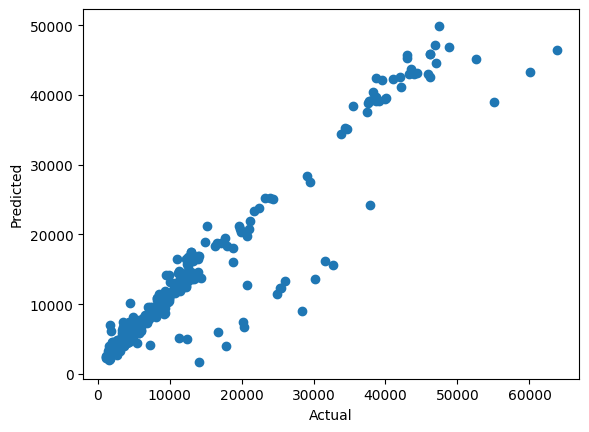

In [13]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

<Axes: xlabel='charges'>

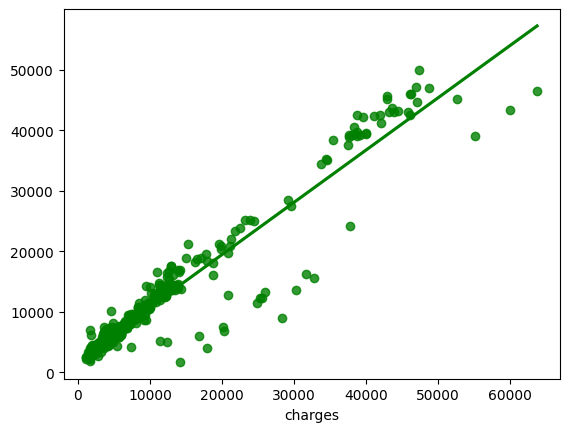

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green')

### Difference Between Actual and Predicted Values

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
899,8688.85885,10586.039158,-1897.180308
1063,5708.86700,7706.707069,-1997.840069
1255,11436.73815,13590.094990,-2153.356840
298,38746.35510,39078.640118,-332.285018
237,4463.20510,6832.310014,-2369.104914
...,...,...,...
534,13831.11520,13888.516993,-57.401793
542,13887.20400,14642.462699,-755.258699
759,3925.75820,6898.822623,-2973.064423
1283,47403.88000,49897.230722,-2493.350722


### Sample Data Prediction

In [16]:
sample_input = pd.DataFrame({
    'age': [36],
    'bmi': [34.43],
    'children': [2],
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

# Normalize the input data
sample_input_scaled = scaler.transform(sample_input)

# Use the best-performing model (Gradient Boosting) to make predictions
predicted_charges = gb_model.predict(sample_input_scaled)

# Output the prediction
print('Predicted Charges for the input data: ', predicted_charges[0])

Predicted Charges for the input data:  7568.056047394761
